<a href="https://colab.research.google.com/github/ManagementBC/WorkersDetection/blob/main/Yolov87_object_detection_on_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun Mar 17 21:31:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/.shortcut-targets-by-id/1TeS9AqYaWXZcW44HCa4keGs1m55SzRs_/YOLOv87


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 28.9/201.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 6.23M/6.23M [00:00<00:00, 21.6MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 5.08MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 15.8ms
Speed: 0.6ms pre-process, 15.8ms inference, 48.7ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# %cd {HOME}
# Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

100%|██████████| 6.23M/6.23M [00:00<00:00, 24.8MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100%|██████████| 104k/104k [00:00<00:00, 55.0MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72712, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.colab import drive

drive._mount('/content/drive')

ValueError: mount failed

## Custom Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/YOLOv87


/content/drive/.shortcut-targets-by-id/1TeS9AqYaWXZcW44HCa4keGs1m55SzRs_/YOLOv87


In [ ]:
!pip install ultralytics


In [ ]:
from ultralytics import YOLO
import torch

# Load your trained model
model = YOLO('/content/drive/MyDrive/YOLOv87/runs/detect/train4/weights/best.pt')  # Make sure the path is correct

# Set path to validation images
val_path = '/content/drive/MyDrive/YOLOv87/data/valid/images'  # Update this path

# Run inference on the validation dataset
results = model(val_path)
results.show()  # Optionally display some predictions

# Extract predictions and their confidence scores
# Note: Adjust this part based on your class of interest (e.g., class '0')
y_scores = []
y_true = []

for i, pred in enumerate(results.pred):
    labels = results.labels[i]  # Ground truth labels for each image
    for *box, conf, cls in pred:
        # Assuming binary classification (object: class 0, no object: class 1)
        # Update the class index based on your specific use case
        y_scores.append(conf.item())
        y_true.append(1 if cls == 0 else 0)  # Adjust based on your classes

# At this point, y_scores and y_true are populated with the confidence scores and ground truth labels



Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded


AttributeError: 'list' object has no attribute 'show'

In [ ]:
import os

# Set environment variable
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:128'


In [ ]:
import torch
torch.cuda.empty_cache()


In [ ]:
import gc

gc.collect()

torch.cuda.empty_cache()

In [ ]:
import os

# Path to the directory containing label files
label_files_path = '/content/drive/MyDrive/Classes/YOLOv87/data/train/labels'

# List all files in the directory
label_files = os.listdir(label_files_path)

# Initialize the count
positive_instances_count = 0

# Iterate over each label file and count the number of object annotations
for label_file in label_files:
    if label_file.endswith('.txt'):
        with open(os.path.join(label_files_path, label_file)) as file:
            annotations = file.readlines()
            # Each line in the file corresponds to one object's annotation
            positive_instances_count += len(annotations)

print(f"Total number of positive instances (objects): {positive_instances_count}")



Total number of positive instances (objects): 5699


In [ ]:
%cd /content/drive/MyDrive/YOLOv87

!yolo task=detect mode=train model=yolov8l.pt data= data.yaml epochs=25 imgsz=800 plots=True



/content/drive/.shortcut-targets-by-id/1TeS9AqYaWXZcW44HCa4keGs1m55SzRs_/YOLOv87
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript

In [ ]:
!yolo task=detect mode=train model=yolov8l.pt data= data.yaml epochs=40 imgsz=800 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.yaml, data=data.yaml, epochs=40, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=1

In [ ]:
Image(filename='/content/drive/MyDrive/YOLOv87/runs/detect/train7/confusion_matrix.png', width=640)

In [ ]:
!ls /content/drive/MyDrive/YOLOv87/runs/detect/train4


args.yaml					     results.png	    val_batch0_pred.jpg
confusion_matrix.png				     train_batch0.jpg	    val_batch1_labels.jpg
events.out.tfevents.1710070106.5699a1c69b22.10366.0  train_batch1470.jpg    val_batch1_pred.jpg
F1_curve.png					     train_batch1471.jpg    val_batch2_labels.jpg
P_curve.png					     train_batch1472.jpg    val_batch2_pred.jpg
PR_curve.png					     train_batch1.jpg	    weights
R_curve.png					     train_batch2.jpg
results.csv					     val_batch0_labels.jpg


In [ ]:
%cd /content/drive/MyDrive/YOLOv87

!yolo task=detect mode=train model=yolov8m.pt data= data.yaml epochs=40 imgsz=800 plots=True

/content/drive/.shortcut-targets-by-id/1TeS9AqYaWXZcW44HCa4keGs1m55SzRs_/YOLOv87
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=data.yaml, epochs=40, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript

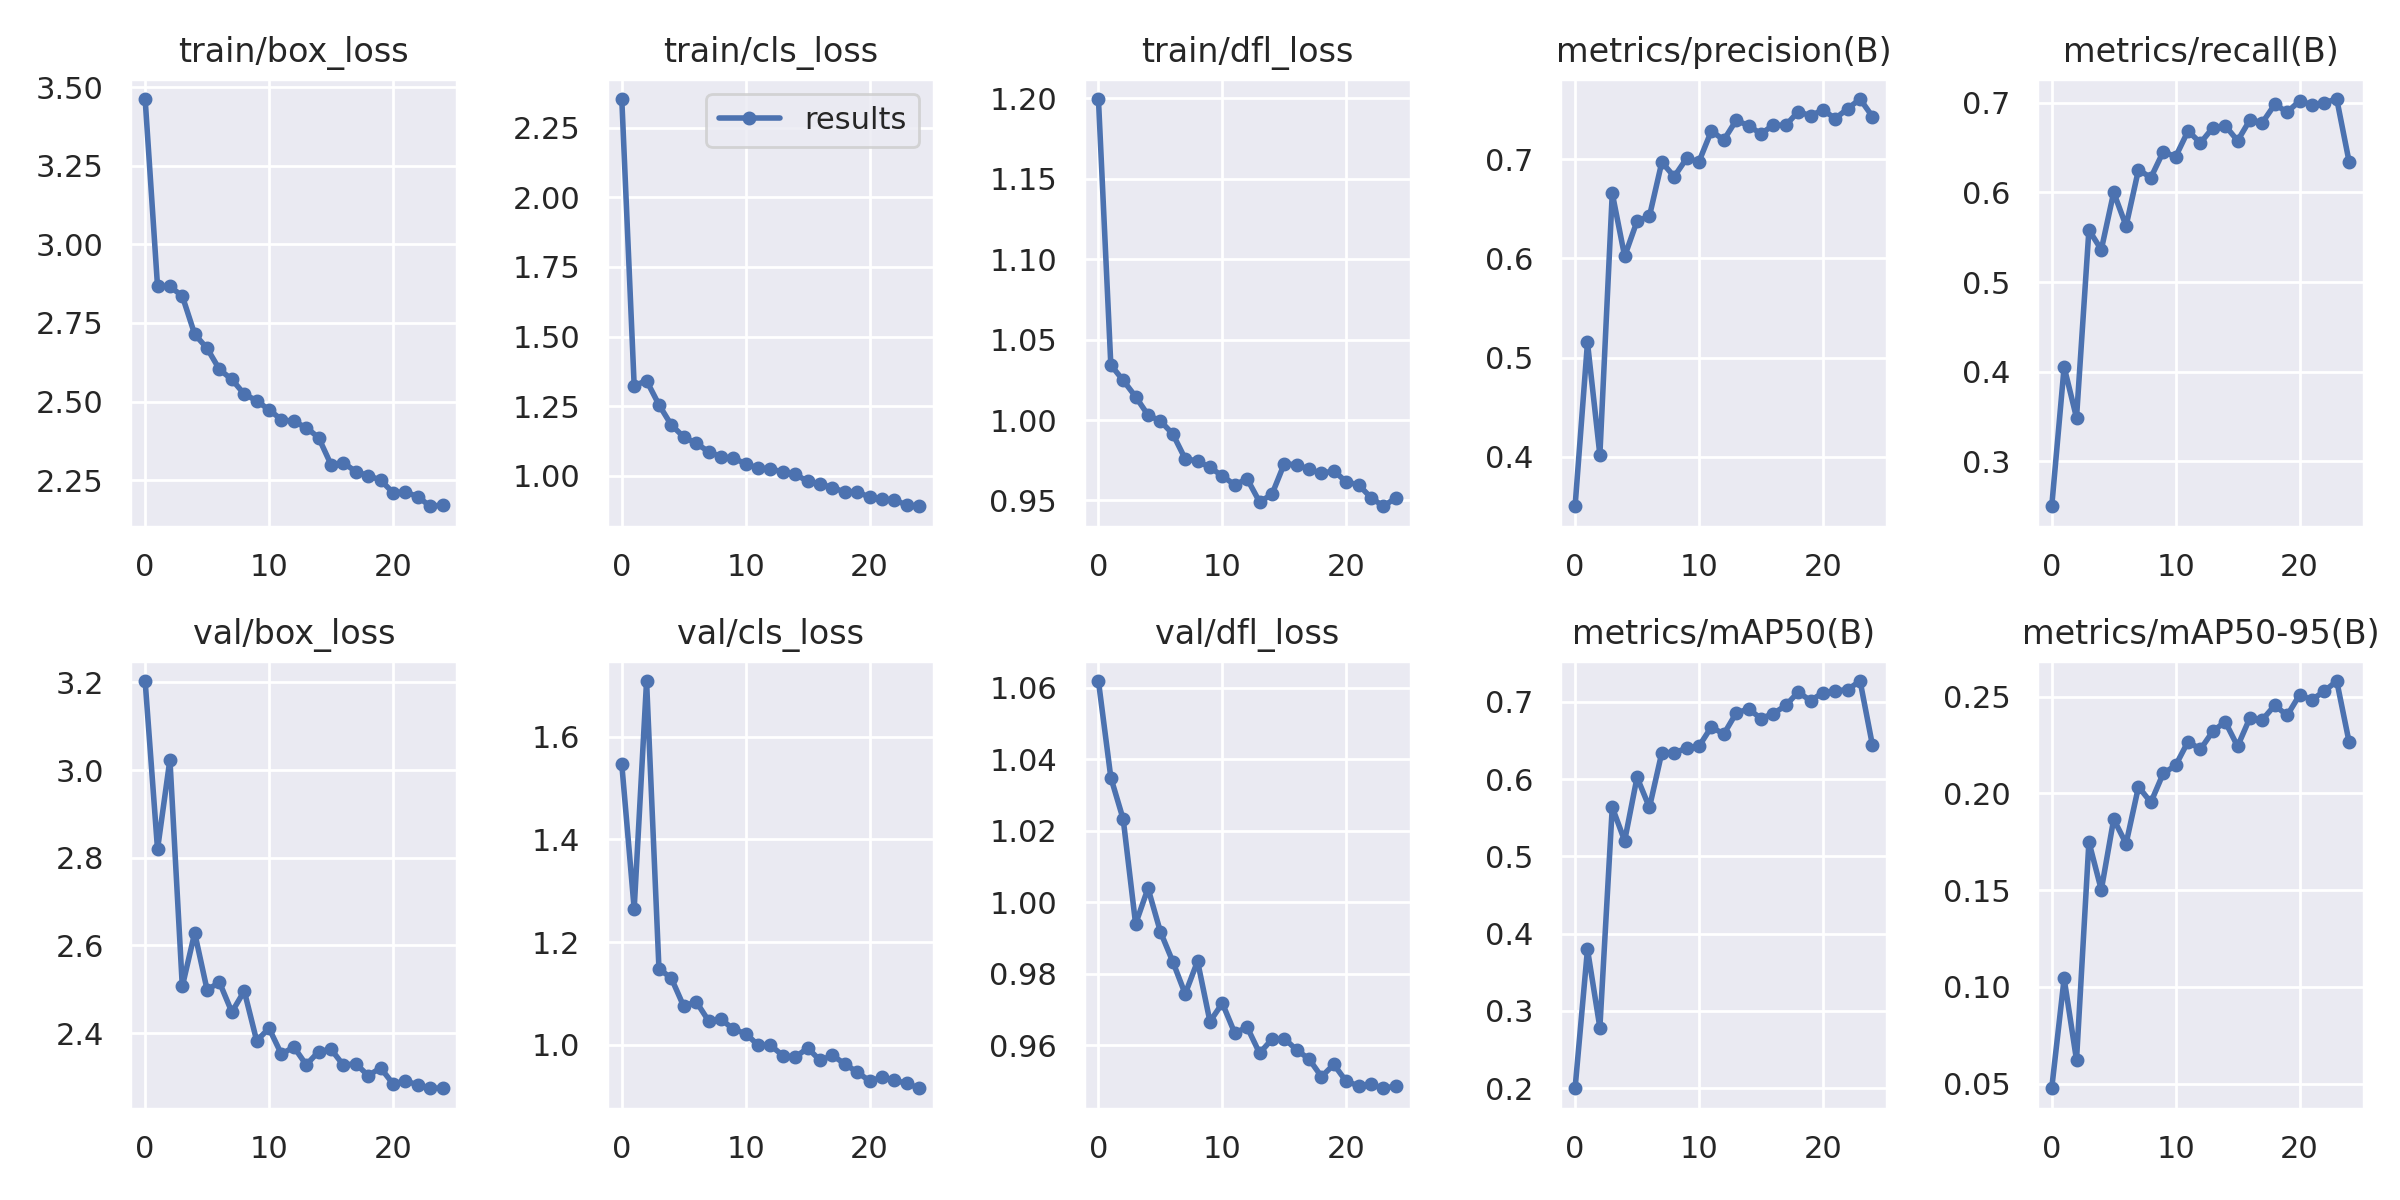

In [ ]:
Image(filename='/content/drive/MyDrive/Classes/YOLOv85/runs/detect/train3/results.png', width=600)

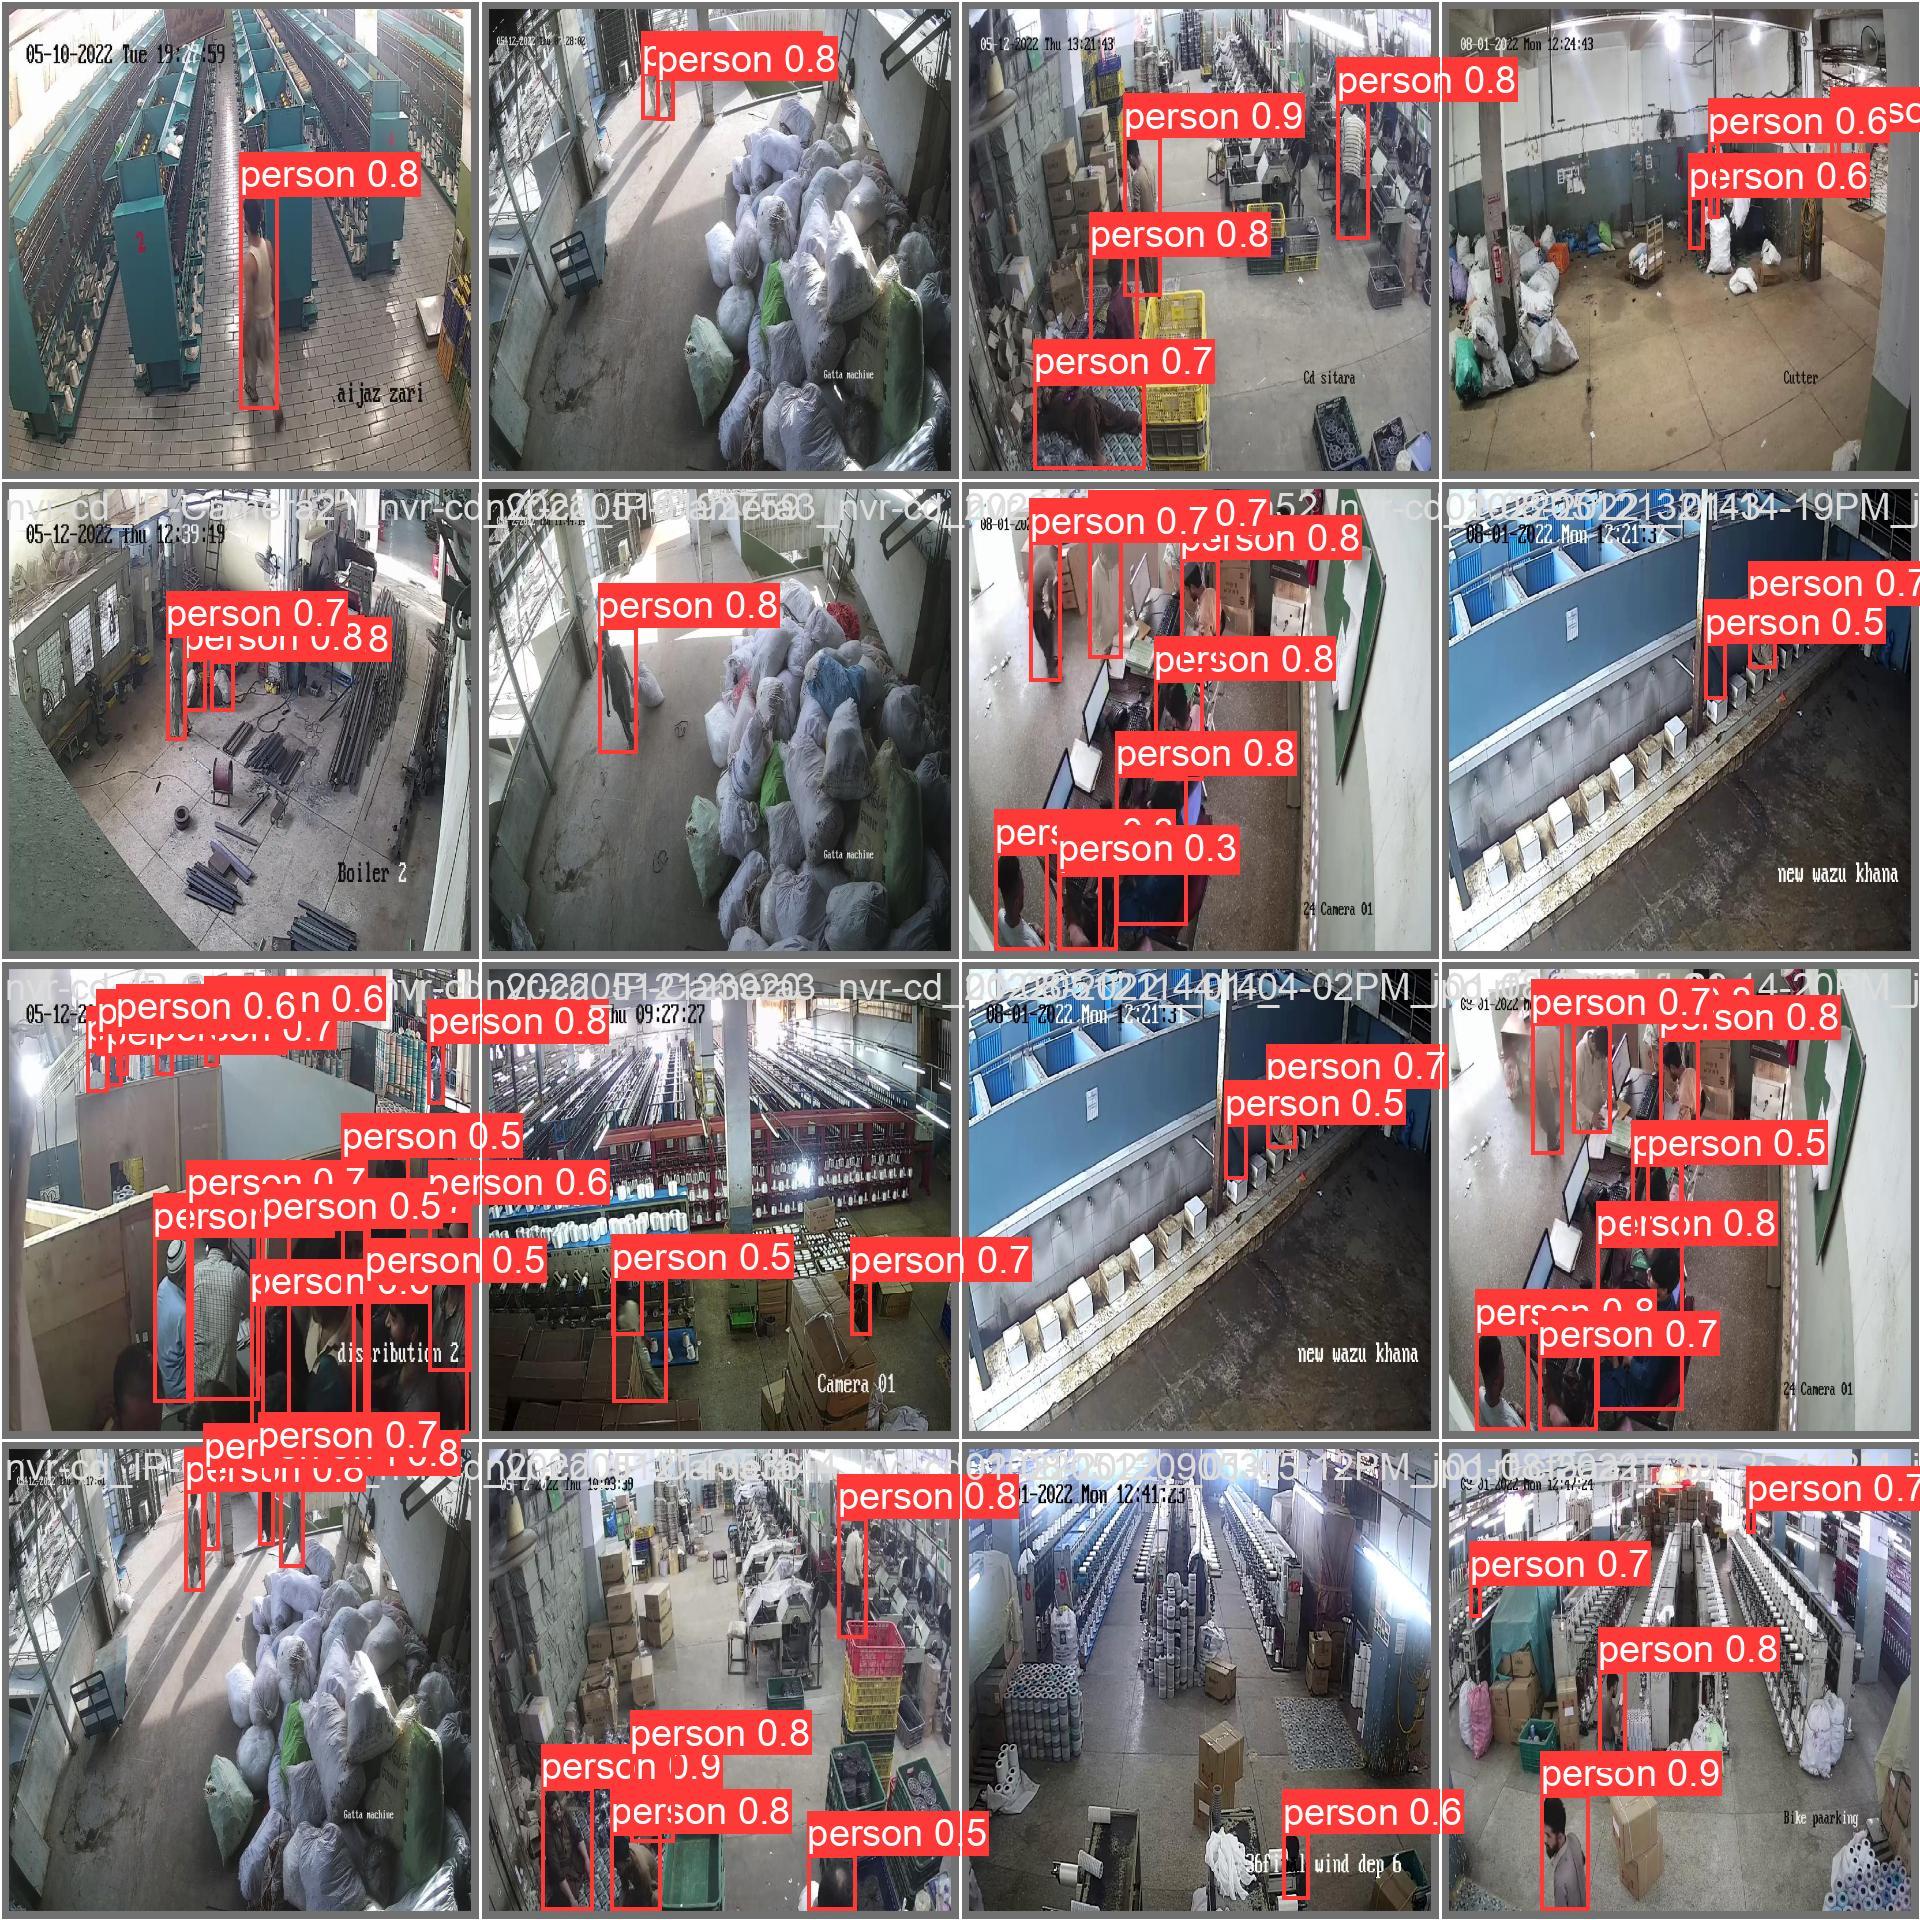

In [ ]:
Image(filename='/content/drive/MyDrive/YOLOv87/runs/detect/train4/val_batch0_pred.jpg', width=600)


## Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/YOLOv87/runs/detect/train7/weights/best.pt data=data.yaml

2024-03-17 21:34:00.416653: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-17 21:34:00.416699: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-17 21:34:00.418009: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-17 21:34:01.483405: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
100% 755k/755k [00:00<00:00, 5.15MB/s]
val: Scanning /conten

## Inference with Custom Model

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/YOLOv87/runs/detect/train7/weights/best.pt  conf=0.25 source=/content/drive/MyDrive/YOLOv87/data/test/images

2024-03-17 21:35:13.615359: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-17 21:35:13.615418: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-17 21:35:13.616731: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-17 21:35:14.643076: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
image 1/86 /content/drive/.shortcut-targets-by-id/1TeS9AqYaW

In [ ]:
def calculate_performance_metrics(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 0
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return accuracy, precision, recall, f1_score

# Example usage with your provided data
TP = 0.92
TN = 1.0
FP = 0.08
FN = 0

accuracy, precision, recall, f1_score = calculate_performance_metrics(TP, TN, FP, FN)

print(f"Accuracy: {accuracy:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1_score:.6f}")



Accuracy: 0.960000
Precision: 0.920000
Recall: 1.000000
F1 Score: 0.958333


In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/YOLOv87/runs/detect/train4/weights/best.pt conf=0.19 source ='/content/drive/MyDrive/YOLOv87/data/test/images/01-08-2022__02-22-20PM_jpg.rf.aeb11bb206625cbb1a947e2ddbc65469.jpg'  imgsz=800  save=True

2024-03-10 13:06:04.296690: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 13:06:04.296744: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 13:06:04.298071: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-10 13:06:05.425244: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Classes/YOLOv85/runs/detect/train8/weights/best.pt conf=0.15 source=/content/drive/MyDrive/YOLOv87/data/test/images/01-08-2022__01-42-57PM_jpg.rf.9b653f22494a31352bd1277b3eafa39a.jpg save=True

2024-03-09 23:12:17.928515: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-09 23:12:17.928574: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-09 23:12:17.929903: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-09 23:12:19.094396: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
image 1/8 /content/drive/MyDrive/Classes/test/test 5.jpg: 448x6

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8l.pt')  # load a pretrained model (recommended for training)

# Train the model on your custom dataset
results = model.train(data='data.yaml', epochs=30, imgsz=, )

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.yaml, data=data.yaml, epochs=30, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.0

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Classes/YOLOv85/runs/detect/train8/weights/best.pt data=/content/drive/MyDrive/Classes/YOLOv85/data/data.yaml

2024-03-09 23:06:49.063867: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-09 23:06:49.063936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-09 23:06:49.065231: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-09 23:06:50.183930: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
Traceback (most recent call last):
  File "/usr/local/bin/yolo"